In [1]:
# 1. count_by_values(df, colname, values)

# 이 함수는 DataFrame의 특정 열에서 특정 값들의 발생 횟수를 계산
# 고유한 'id' 값들을 가진 DataFrame fts를 초기화합니다
# values에 있는 각 값에 대해, 지정된 colname에서 그 값의 발생 횟수를 계산하는 임시 DataFrame tmp_df를 생성합니다.
# tmp_df를 'id'를 기준으로 fts와 결합하고, values에 있는 모든 값에 대해 이 과정을 반복합니다.
# 함수는 각 고유 'id'에 대해 지정된 값들의 개수를 포함하는 fts를 반환합니다.

# 2. dev_feats(df)
# 이 함수는 DataFrame df에서 특성을 개발하기 위해 다양한 계산과 데이터 변환을 수행

# count_by_values 함수를 사용하여 'activity', 'text_change', 'down_event', 'up_event' 열의 값에 대한 특성을 생성
# 텍스트 변경에 관련된 통계적 특성을 계산합니다. 예를 들어, 입력 단어 수, 최대/평균/표준편차 길이 등을 계산
# 'action_time' 및 다른 숫자형 열에 대한 요약 통계(합계, 평균, 표준편차 등)를 계산
# 카테고리형 열에 대한 특성을 생성합니다. 예를 들어, 고유한 'activity', 'down_event', 'up_event', 'text_change' 값의 수를 계산
# 유휴 시간에 대한 특성을 계산합니다. 예를 들어, 키 입력 간의 최대 지연 시간, 중간 지연 시간 등을 계산
# 'P-bursts'와 'R-bursts' 특성을 계산합니다. 이는 특정 행동 패턴(예: 연속적인 입력 또는 삭제)에 대한 통계를 나타냅니다.

In [2]:
# 1. q1(x) & q3(x)

# q1(x)는 주어진 데이터의 하위 25% (제1사분위수)를 계산
# q3(x)는 주어진 데이터의 상위 25% (제3사분위수)를 계산

# 2. reconstruct_essay(currTextInput)

# 이 함수는 주어진 입력 로그를 바탕으로 에세이 텍스트를 재구성
# 'Replace', 'Paste', 'Remove/Cut', 'Move' 등의 행동을 확인하고, 이에 따라 텍스트를 수정합니다.
# 예를 들어, 'Replace' 동작은 특정 부분의 텍스트를 다른 텍스트로 교체합니다.

# 3. get_essay_df(df)

# 이 함수는 입력된 DataFrame을 사용하여 각 'id'에 대한 에세이 텍스트를 재구성
# 'Nonproduction' 활동을 제외하고, 나머지 활동으로부터 에세이를 재구성
# 재구성된 에세이를 'id'와 함께 새로운 DataFrame으로 반환

# 4. word_feats(df)

# 이 함수는 에세이 텍스트에서 단어 관련 특성을 추출
# 단어 길이, 단어 수 등을 계산하고, 이러한 값들에 대한 다양한 통계치를 계산합니다(예: 평균, 최소값, 최대값 등).

# 5. sent_feats(df)

# 이 함수는 에세이 텍스트에서 문장 관련 특성을 추출
# 문장 길이, 문장 내 단어 수 등을 계산하고, 이러한 값들에 대한 다양한 통계치를 계산

# 6. parag_feats(df)

# 이 함수는 에세이 텍스트에서 문단 관련 특성을 추출
# 문단 길이, 문단 내 단어 수 등을 계산하고, 이러한 값들에 대한 다양한 통계치를 계산

# 7. product_to_keys(logs, essays)

# 이 함수는 입력된 로그와 에세이를 바탕으로 'product_len'과 'keys_pressed' 비율을 계산
# 'product_len'은 에세이의 길이, 'keys_pressed'는 입력 및 삭제된 키의 수
# 최종적으로 'product_to_keys' 비율을 반환

# 8. get_keys_pressed_per_second(logs)

# 이 함수는 입력 및 삭제된 키의 수를 시간 단위로 계산
# 'keys_pressed'는 입력 및 삭제된 키의 수, 'min_down_time'과 'max_up_time'은 각각 최소 다운 타임과 최대 업 타임
# 이를 바탕으로 초당 키 입력 수 ('keys_per_second')를 계산

In [3]:
## lgbm,xgb blending 시의 최적의 가중치 구해보자 

# def train_valid_split(data_x, data_y, train_idx, valid_idx):
#     x_train = data_x.iloc[train_idx]
#     y_train = data_y[train_idx]
#     x_valid = data_x.iloc[valid_idx]
#     y_valid = data_y[valid_idx]
#     return x_train, y_train, x_valid, y_valid

# # LightGBM 
# lgbm_param = {
#     'n_estimators': 1024,
#     'learning_rate': 0.005,
#     'metric': 'rmse',
#     'random_state': 42
# }

# # XGB
# xgb_param = {
#     'reg_alpha': 0.0008774661176012108,
#     'reg_lambda': 2.542812743920178,
#     'colsample_bynode': 0.7839026197349153,
#     'subsample': 0.8994226268096415,
#     'eta': 0.04730766698056879, 
#     'max_depth': 3, 
#     'n_estimators': 1024,
#     'random_state': 42,
#     'eval_metric': 'rmse'
# }

# lgbm_model = LGBMRegressor(**lgbm_param)
# xgb_model = XGBRegressor(**xgb_param)

# # stratified kfold 적용
# skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
# lgbm_preds = []
# xgb_preds = []
# valid_y_list = []

# for train_index, valid_index in skf.split(x, y.astype(str)):     
#     train_x, train_y, valid_x, valid_y = train_valid_split(x, y, train_index, valid_index)

#     lgbm_model.fit(train_x, train_y)
#     lgbm_preds.append(lgbm_model.predict(valid_x))

#     xgb_model.fit(train_x, train_y)
#     xgb_preds.append(xgb_model.predict(valid_x))

#     # 검증 타겟 저장
#     valid_y_list.append(valid_y)

# # 모든 fold의 예측값과 실제값 통합
# lgbm_preds = np.concatenate(lgbm_preds)
# xgb_preds = np.concatenate(xgb_preds)
# valid_y_combined = np.concatenate(valid_y_list)

# # 최적 가중치 
# best_sc = float('inf')
# best_w = 0
# for w in np.arange(0, 1.01, 0.01):
#     combined_pred = w * lgbm_preds + (1-w) * xgb_preds
#     sc = mean_squared_error(valid_y_combined, combined_pred, squared=False)
#     if sc < best_sc:
#         best_sc = sc
#         best_w = w

# print('최적의 RMSE 점수 = {:.5f}'.format(best_sc))
# print('최적의 가중치 W = {:.3f}'.format(best_w))

In [4]:
# public lgbm 선 적용 이후 lgbm+xgb랑 가중치 조절 후 앙상블 한 번 더 ㄱ 

In [5]:
import torch
import warnings
warnings.filterwarnings('ignore')
import gc
import ctypes
def clean_memory():
    gc.collect()
    ctypes.CDLL("libc.so.6").malloc_trim(0)
    torch.cuda.empty_cache()
clean_memory()

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
%matplotlib inline
import gc
import os
import itertools
import pickle

from random import choice, choices
from functools import reduce
from tqdm import tqdm
from itertools import cycle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from functools import reduce
from itertools import cycle
from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn import metrics, model_selection, preprocessing, linear_model, ensemble, decomposition, tree
from transformers import BertTokenizer
import warnings

import os
import gc
import re
import random
from collections import Counter, defaultdict
import pprint
import time
import copy
import lightgbm as lgb

import seaborn as sns
from tqdm.autonotebook import tqdm

# from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder, PowerTransformer, RobustScaler, FunctionTransformer
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer



In [7]:
def getEssays(df):
    # Copy required columns
    textInputDf = df[['id', 'activity', 'cursor_position', 'text_change']].copy()
    
    # Get rid of text inputs that make no change
    # Note: Shift was unpreditcable so ignored
    textInputDf = textInputDf[textInputDf.activity != 'Nonproduction']

    # Get how much each Id there is
    valCountsArr = textInputDf['id'].value_counts(sort=False).values

    # Holds the final index of the previous Id
    lastIndex = 0

    # Holds all the essays
    essaySeries = pd.Series()

    # Fills essay series with essays
    for index, valCount in enumerate(valCountsArr):

        # Indexes down_time at current Id
        currTextInput = textInputDf[['activity', 'cursor_position', 'text_change']].iloc[lastIndex : lastIndex + valCount]

        # Update the last index
        lastIndex += valCount

        # Where the essay content will be stored
        essayText = ""

        
        # Produces the essay
        for Input in currTextInput.values:
            
            # Input[0] = activity
            # Input[2] = cursor_position
            # Input[3] = text_change
            
            # If activity = Replace
            if Input[0] == 'Replace':
                # splits text_change at ' => '
                replaceTxt = Input[2].split(' => ')
                
                # DONT TOUCH
                essayText = essayText[:Input[1] - len(replaceTxt[1])] + replaceTxt[1] + essayText[Input[1] - len(replaceTxt[1]) + len(replaceTxt[0]):]
                continue

                
            # If activity = Paste    
            if Input[0] == 'Paste':
                # DONT TOUCH
                essayText = essayText[:Input[1] - len(Input[2])] + Input[2] + essayText[Input[1] - len(Input[2]):]
                continue

                
            # If activity = Remove/Cut
            if Input[0] == 'Remove/Cut':
                # DONT TOUCH
                essayText = essayText[:Input[1]] + essayText[Input[1] + len(Input[2]):]
                continue

                
            # If activity = Move...
            if "M" in Input[0]:
                # Gets rid of the "Move from to" text
                croppedTxt = Input[0][10:]
                
                # Splits cropped text by ' To '
                splitTxt = croppedTxt.split(' To ')
                
                # Splits split text again by ', ' for each item
                valueArr = [item.split(', ') for item in splitTxt]
                
                # Move from [2, 4] To [5, 7] = (2, 4, 5, 7)
                moveData = (int(valueArr[0][0][1:]), int(valueArr[0][1][:-1]), int(valueArr[1][0][1:]), int(valueArr[1][1][:-1]))

                # Skip if someone manages to activiate this by moving to same place
                if moveData[0] != moveData[2]:
                    # Check if they move text forward in essay (they are different)
                    if moveData[0] < moveData[2]:
                        # DONT TOUCH
                        essayText = essayText[:moveData[0]] + essayText[moveData[1]:moveData[3]] + essayText[moveData[0]:moveData[1]] + essayText[moveData[3]:]
                    else:
                        # DONT TOUCH
                        essayText = essayText[:moveData[2]] + essayText[moveData[0]:moveData[1]] + essayText[moveData[2]:moveData[0]] + essayText[moveData[1]:]
                continue
                
                
            # If just input
            # DONT TOUCH
            essayText = essayText[:Input[1] - len(Input[2])] + Input[2] + essayText[Input[1] - len(Input[2]):]

            
        # Sets essay at index  
        essaySeries[index] = essayText
     
    
    # Sets essay series index to the ids
    essaySeries.index =  textInputDf['id'].unique()
    
    
    # Returns the essay series
    return essaySeries

In [8]:
traindf = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv')
train_scores = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv')
testdf = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv')

In [9]:
%%time
train_essays = getEssays(traindf)

CPU times: user 8min 5s, sys: 3min 1s, total: 11min 7s
Wall time: 11min 7s


In [10]:
test_essays = getEssays(testdf)

In [11]:
train_essaysdf = pd.DataFrame({'id': train_essays.index, 'essay': train_essays.values})
test_essaysdf = pd.DataFrame({'id': test_essays.index, 'essay': test_essays.values})

In [12]:
merged_data = train_essaysdf.merge(train_scores, on='id')

In [13]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_tokenizer_train = count_vectorizer.fit_transform(merged_data['essay'])
X_tokenizer_test = count_vectorizer.transform(test_essaysdf['essay'])
count_vectorizer.get_feature_names_out() #ADDED
y = merged_data['score']

In [14]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

In [15]:
X_tokenizer_train = X_tokenizer_train.todense()
X_tokenizer_test = X_tokenizer_test.todense()

In [16]:
for i in range(X_tokenizer_train.shape[1]) : 
    L = list(X_tokenizer_train[:,i])
    li = [int(x) for x in L ]
    df_train[f'feature {i}'] = li

In [17]:
for i in range(X_tokenizer_test.shape[1]) : 
    L = list(X_tokenizer_test[:,i])
    li = [int(x) for x in L ]
    df_test[f'feature {i}'] = li

In [18]:
df_train_index = train_essaysdf['id']
df_test_index = test_essaysdf['id']

In [19]:
df_train.loc[:, 'id'] = df_train_index
df_test.loc[:, 'id'] = df_test_index

In [20]:
train_agg_fe_df = traindf.groupby("id")[['down_time', 'up_time', 'action_time', 'cursor_position', 'word_count']].agg(['mean', 'std', 'min', 'max', 'last', 'first', 'sem', 'median', 'sum'])
train_agg_fe_df.columns = ['_'.join(x) for x in train_agg_fe_df.columns]
train_agg_fe_df = train_agg_fe_df.add_prefix("tmp_")
train_agg_fe_df.reset_index(inplace=True)

In [21]:
test_agg_fe_df = testdf.groupby("id")[['down_time', 'up_time', 'action_time', 'cursor_position', 'word_count']].agg(['mean', 'std', 'min', 'max', 'last', 'first', 'sem', 'median', 'sum'])
test_agg_fe_df.columns = ['_'.join(x) for x in test_agg_fe_df.columns]
test_agg_fe_df = test_agg_fe_df.add_prefix("tmp_")
test_agg_fe_df.reset_index(inplace=True)

In [22]:
from collections import defaultdict

class Preprocessor:
    
    def __init__(self, seed):
        self.seed = seed
        
        self.activities = ['Input', 'Remove/Cut', 'Nonproduction', 'Replace', 'Paste']
        self.events = ['q', 'Space', 'Backspace', 'Shift', 'ArrowRight', 'Leftclick', 'ArrowLeft', '.', ',', 
              'ArrowDown', 'ArrowUp', 'Enter', 'CapsLock', "'", 'Delete', 'Unidentified']
        self.text_changes = ['q', ' ', 'NoChange', '.', ',', '\n', "'", '"', '-', '?', ';', '=', '/', '\\', ':']
        self.punctuations = ['"', '.', ',', "'", '-', ';', ':', '?', '!', '<', '>', '/',
                        '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '+']
        self.gaps = [1, 2, 3, 5, 10, 20, 50, 100]
        
        self.idf = defaultdict(float)
#         self.gaps = [1, 2]
    
    def activity_counts(self, df):
        tmp_df = df.groupby('id').agg({'activity': list}).reset_index()
        ret = list()
        for li in tqdm(tmp_df['activity'].values):
            items = list(Counter(li).items())
            di = dict()
            for k in self.activities:
                di[k] = 0
            for item in items:
                k, v = item[0], item[1]
                if k in di:
                    di[k] = v
            ret.append(di)
        ret = pd.DataFrame(ret)
        cols = [f'activity_{i}_count' for i in range(len(ret.columns))]
        ret.columns = cols

        cnts = ret.sum(1)

        for col in cols:
            if col in self.idf.keys():
                idf = self.idf[col]
            else:
                idf = df.shape[0] / (ret[col].sum() + 1)
                idf = np.log(idf)
                self.idf[col] = idf

            ret[col] = 1 + np.log(ret[col] / cnts)
            ret[col] *= idf

        return ret


    def event_counts(self, df, colname):
        tmp_df = df.groupby('id').agg({colname: list}).reset_index()
        ret = list()
        for li in tqdm(tmp_df[colname].values):
            items = list(Counter(li).items())
            di = dict()
            for k in self.events:
                di[k] = 0
            for item in items:
                k, v = item[0], item[1]
                if k in di:
                    di[k] = v
            ret.append(di)
        ret = pd.DataFrame(ret)
        cols = [f'{colname}_{i}_count' for i in range(len(ret.columns))]
        ret.columns = cols

        cnts = ret.sum(1)

        for col in cols:
            if col in self.idf.keys():
                idf = self.idf[col]
            else:
                idf = df.shape[0] / (ret[col].sum() + 1)
                idf = np.log(idf)
                self.idf[col] = idf
            
            ret[col] = 1 + np.log(ret[col] / cnts)
            ret[col] *= idf

        return ret


    def text_change_counts(self, df):
        tmp_df = df.groupby('id').agg({'text_change': list}).reset_index()
        ret = list()
        for li in tqdm(tmp_df['text_change'].values):
            items = list(Counter(li).items())
            di = dict()
            for k in self.text_changes:
                di[k] = 0
            for item in items:
                k, v = item[0], item[1]
                if k in di:
                    di[k] = v
            ret.append(di)
        ret = pd.DataFrame(ret)
        cols = [f'text_change_{i}_count' for i in range(len(ret.columns))]
        ret.columns = cols

        cnts = ret.sum(1)

        for col in cols:
            if col in self.idf.keys():
                idf = self.idf[col]
            else:
                idf = df.shape[0] / (ret[col].sum() + 1)
                idf = np.log(idf)
                self.idf[col] = idf
            
            ret[col] = 1 + np.log(ret[col] / cnts)
            ret[col] *= idf
            
        return ret

    def match_punctuations(self, df):
        tmp_df = df.groupby('id').agg({'down_event': list}).reset_index()
        ret = list()
        for li in tqdm(tmp_df['down_event'].values):
            cnt = 0
            items = list(Counter(li).items())
            for item in items:
                k, v = item[0], item[1]
                if k in self.punctuations:
                    cnt += v
            ret.append(cnt)
        ret = pd.DataFrame({'punct_cnt': ret})
        return ret


    def get_input_words(self, df):
        tmp_df = df[(~df['text_change'].str.contains('=>'))&(df['text_change'] != 'NoChange')].reset_index(drop=True)
        tmp_df = tmp_df.groupby('id').agg({'text_change': list}).reset_index()
        tmp_df['text_change'] = tmp_df['text_change'].apply(lambda x: ''.join(x))
        tmp_df['text_change'] = tmp_df['text_change'].apply(lambda x: re.findall(r'q+', x))
        tmp_df['input_word_count'] = tmp_df['text_change'].apply(len)
        tmp_df['input_word_length_mean'] = tmp_df['text_change'].apply(lambda x: np.mean([len(i) for i in x] if len(x) > 0 else 0))
        tmp_df['input_word_length_max'] = tmp_df['text_change'].apply(lambda x: np.max([len(i) for i in x] if len(x) > 0 else 0))
        tmp_df['input_word_length_std'] = tmp_df['text_change'].apply(lambda x: np.std([len(i) for i in x] if len(x) > 0 else 0))
        tmp_df.drop(['text_change'], axis=1, inplace=True)
        return tmp_df
    
    def make_feats(self, df):
        
        print("Starting to engineer features")
        
        # initialize features dataframe
        feats = pd.DataFrame({'id': df['id'].unique().tolist()})
        
        # get shifted features
        # time shift
        print("Engineering time data")
        for gap in self.gaps:
            print(f"> for gap {gap}")
            df[f'up_time_shift{gap}'] = df.groupby('id')['up_time'].shift(gap)
            df[f'action_time_gap{gap}'] = df['down_time'] - df[f'up_time_shift{gap}']
        df.drop(columns=[f'up_time_shift{gap}' for gap in self.gaps], inplace=True)

        # cursor position shift
        print("Engineering cursor position data")
        for gap in self.gaps:
            print(f"> for gap {gap}")
            df[f'cursor_position_shift{gap}'] = df.groupby('id')['cursor_position'].shift(gap)
            df[f'cursor_position_change{gap}'] = df['cursor_position'] - df[f'cursor_position_shift{gap}']
            df[f'cursor_position_abs_change{gap}'] = np.abs(df[f'cursor_position_change{gap}'])
        df.drop(columns=[f'cursor_position_shift{gap}' for gap in self.gaps], inplace=True)

        # word count shift
        print("Engineering word count data")
        for gap in self.gaps:
            print(f"> for gap {gap}")
            df[f'word_count_shift{gap}'] = df.groupby('id')['word_count'].shift(gap)
            df[f'word_count_change{gap}'] = df['word_count'] - df[f'word_count_shift{gap}']
            df[f'word_count_abs_change{gap}'] = np.abs(df[f'word_count_change{gap}'])
        df.drop(columns=[f'word_count_shift{gap}' for gap in self.gaps], inplace=True)
        
        # get aggregate statistical features
        print("Engineering statistical summaries for features")
        # [(feature name, [ stat summaries to add ])]
        feats_stat = [
            ('event_id', ['max']),
            ('up_time', ['max']),
            ('action_time', ['max', 'min', 'mean', 'std', 'quantile', 'sem', 'sum', 'skew']),
            ('activity', ['nunique']),
            ('down_event', ['nunique']),
            ('up_event', ['nunique']),
            ('text_change', ['nunique']),
            ('cursor_position', ['nunique', 'max', 'quantile', 'sem', 'mean']),
            ('word_count', ['nunique', 'max', 'quantile', 'sem', 'mean'])]
        for gap in self.gaps:
            feats_stat.extend([
                (f'action_time_gap{gap}', ['max', 'min', 'mean', 'std', 'quantile', 'sem', 'sum', 'skew']),
                (f'cursor_position_change{gap}', ['max', 'mean', 'std', 'quantile', 'sem', 'sum', 'skew']),
                (f'word_count_change{gap}', ['max', 'mean', 'std', 'quantile', 'sem', 'sum', 'skew'])
            ])
        
        pbar = tqdm(feats_stat)
        for item in pbar:
            colname, methods = item[0], item[1]
            for method in methods:
                pbar.set_postfix()
                if isinstance(method, str):
                    method_name = method
                else:
                    method_name = method.__name__
                    
                pbar.set_postfix(column=colname, method=method_name)
                tmp_df = df.groupby(['id']).agg({colname: method}).reset_index().rename(columns={colname: f'{colname}_{method_name}'})
                feats = feats.merge(tmp_df, on='id', how='left')

        # counts
        print("Engineering activity counts data")
        tmp_df = self.activity_counts(df)
        feats = pd.concat([feats, tmp_df], axis=1)
        
        print("Engineering event counts data")
        tmp_df = self.event_counts(df, 'down_event')
        feats = pd.concat([feats, tmp_df], axis=1)
        tmp_df = self.event_counts(df, 'up_event')
        feats = pd.concat([feats, tmp_df], axis=1)
        
        print("Engineering text change counts data")
        tmp_df = self.text_change_counts(df)
        feats = pd.concat([feats, tmp_df], axis=1)
        
        print("Engineering punctuation counts data")
        tmp_df = self.match_punctuations(df)
        feats = pd.concat([feats, tmp_df], axis=1)

        # input words
        print("Engineering input words data")
        tmp_df = self.get_input_words(df)
        feats = pd.merge(feats, tmp_df, on='id', how='left')

        # compare feats
        print("Engineering ratios data")
        feats['word_time_ratio'] = feats['word_count_max'] / feats['up_time_max']
        feats['word_event_ratio'] = feats['word_count_max'] / feats['event_id_max']
        feats['event_time_ratio'] = feats['event_id_max']  / feats['up_time_max']
        feats['idle_time_ratio'] = feats['action_time_gap1_sum'] / feats['up_time_max']
        
        print("Done!")
        return feats

In [23]:
# 밑에서 kurt 관련 super() error 발생해서 statistics 중에서 걍 위에서 kurt 지워버렸음

In [24]:
preprocessor = Preprocessor(seed=42)

print("Engineering features for training data")

other_train_feats = preprocessor.make_feats(traindf)

print()
print("-"*25)
print("Engineering features for test data")
print("-"*25)
other_test_feats = preprocessor.make_feats(testdf)

Engineering features for training data
Starting to engineer features
Engineering time data
> for gap 1
> for gap 2
> for gap 3
> for gap 5
> for gap 10
> for gap 20
> for gap 50
> for gap 100
Engineering cursor position data
> for gap 1
> for gap 2
> for gap 3
> for gap 5
> for gap 10
> for gap 20
> for gap 50
> for gap 100
Engineering word count data
> for gap 1
> for gap 2
> for gap 3
> for gap 5
> for gap 10
> for gap 20
> for gap 50
> for gap 100
Engineering statistical summaries for features


  0%|          | 0/33 [00:00<?, ?it/s]

Engineering activity counts data


  0%|          | 0/2471 [00:00<?, ?it/s]

Engineering event counts data


  0%|          | 0/2471 [00:00<?, ?it/s]

  0%|          | 0/2471 [00:00<?, ?it/s]

Engineering text change counts data


  0%|          | 0/2471 [00:00<?, ?it/s]

Engineering punctuation counts data


  0%|          | 0/2471 [00:00<?, ?it/s]

Engineering input words data
Engineering ratios data
Done!

-------------------------
Engineering features for test data
-------------------------
Starting to engineer features
Engineering time data
> for gap 1
> for gap 2
> for gap 3
> for gap 5
> for gap 10
> for gap 20
> for gap 50
> for gap 100
Engineering cursor position data
> for gap 1
> for gap 2
> for gap 3
> for gap 5
> for gap 10
> for gap 20
> for gap 50
> for gap 100
Engineering word count data
> for gap 1
> for gap 2
> for gap 3
> for gap 5
> for gap 10
> for gap 20
> for gap 50
> for gap 100
Engineering statistical summaries for features


  0%|          | 0/33 [00:00<?, ?it/s]

Engineering activity counts data


  0%|          | 0/3 [00:00<?, ?it/s]

Engineering event counts data


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Engineering text change counts data


  0%|          | 0/3 [00:00<?, ?it/s]

Engineering punctuation counts data


  0%|          | 0/3 [00:00<?, ?it/s]

Engineering input words data
Engineering ratios data
Done!


In [25]:
df_train_all = pd.DataFrame()
df_test_all = pd.DataFrame()

In [26]:
df_train_all = df_train.merge(train_agg_fe_df,on='id')

In [27]:
df_test_all = df_test.merge(test_agg_fe_df,on='id')

In [28]:
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)

In [29]:
AGGREGATIONS = ['count', 'mean', 'std', 'min', 'max', 'first', 'last', 'sem', q1, 'median', q3, 'skew', 'sum']

def split_essays_into_sentences(df):
    essay_df = df
    essay_df['id'] = essay_df.index
    essay_df['sent'] = essay_df['essay'].apply(lambda x: re.split('\\.|\\?|\\!',str(x)))
    essay_df = essay_df.explode('sent')
    essay_df['sent'] = essay_df['sent'].apply(lambda x: x.replace('\n','').strip())
    # Number of characters in sentences
    essay_df['sent_len'] = essay_df['sent'].apply(lambda x: len(x))
    # Number of words in sentences
    essay_df['sent_word_count'] = essay_df['sent'].apply(lambda x: len(x.split(' ')))
    essay_df = essay_df[essay_df.columns.tolist()].reset_index(drop=True)
    return essay_df

def compute_sentence_aggregations(df):
    sent_agg_df = pd.concat(
        [df[['id','sent_len']].groupby(['id']).agg(AGGREGATIONS), df[['id','sent_word_count']].groupby(['id']).agg(AGGREGATIONS)], axis=1
    )
    sent_agg_df.columns = ['_'.join(x) for x in sent_agg_df.columns]
    sent_agg_df['id'] = sent_agg_df.index
    sent_agg_df = sent_agg_df.reset_index(drop=True)
    sent_agg_df.drop(columns=["sent_word_count_count"], inplace=True)
    sent_agg_df = sent_agg_df.rename(columns={"sent_len_count":"sent_count"})
    return sent_agg_df

def split_essays_into_paragraphs(df):
    essay_df = df
    essay_df['id'] = essay_df.index
    essay_df['paragraph'] = essay_df['essay'].apply(lambda x: str(x).split('\n'))
    essay_df = essay_df.explode('paragraph')
    # Number of characters in paragraphs
    essay_df['paragraph_len'] = essay_df['paragraph'].apply(lambda x: len(x)) 
    # Number of words in paragraphs
    essay_df['paragraph_word_count'] = essay_df['paragraph'].apply(lambda x: len(x.split(' ')))
    essay_df = essay_df[essay_df.paragraph_len!=0].reset_index(drop=True)
    return essay_df

def compute_paragraph_aggregations(df):
    paragraph_agg_df = pd.concat(
        [df[['id','paragraph_len']].groupby(['id']).agg(AGGREGATIONS), df[['id','paragraph_word_count']].groupby(['id']).agg(AGGREGATIONS)], axis=1
    ) 
    paragraph_agg_df.columns = ['_'.join(x) for x in paragraph_agg_df.columns]
    paragraph_agg_df['id'] = paragraph_agg_df.index
    paragraph_agg_df = paragraph_agg_df.reset_index(drop=True)
    paragraph_agg_df.drop(columns=["paragraph_word_count_count"], inplace=True)
    paragraph_agg_df = paragraph_agg_df.rename(columns={"paragraph_len_count":"paragraph_count"})
    return paragraph_agg_df

In [30]:
train_sent_df = split_essays_into_sentences(train_essaysdf)
train_sent_agg_df = compute_sentence_aggregations(train_sent_df)

In [31]:
train_paragraph_df = split_essays_into_paragraphs(train_essaysdf)
train_paragraph_agg_df = compute_paragraph_aggregations(train_paragraph_df)

In [32]:
test_sent_agg_df = compute_sentence_aggregations(split_essays_into_sentences(test_essaysdf))
test_paragraph_agg_df = compute_paragraph_aggregations(split_essays_into_paragraphs(test_essaysdf))

In [33]:
train_paragraph_agg_df.loc[:, 'id'] = df_train_index
train_sent_agg_df.loc[:, 'id'] = df_train_index

In [34]:
test_paragraph_agg_df.loc[:, 'id'] = df_test_index
test_sent_agg_df.loc[:, 'id'] = df_test_index

In [35]:
new_train_feats = pd.DataFrame()
new_test_feats = pd.DataFrame()

In [36]:
new_train_feats = train_paragraph_agg_df.merge(df_train_all,on='id')
new_train_feats = new_train_feats.merge(train_sent_agg_df,on='id')

In [37]:
new_test_feats = test_paragraph_agg_df.merge(df_test_all,on='id')
new_test_feats = new_test_feats.merge(test_sent_agg_df,on='id')

In [38]:
train_feats = pd.DataFrame()
test_feats = pd.DataFrame()

In [39]:
train_feats = new_train_feats.merge(other_train_feats,on='id')
test_feats = new_test_feats.merge(other_test_feats,on='id')

In [40]:
data = []

for logs in [traindf, testdf]:
    logs['up_time_lagged'] = logs.groupby('id')['up_time'].shift(1).fillna(logs['down_time'])
    logs['time_diff'] = abs(logs['down_time'] - logs['up_time_lagged']) / 1000

    group = logs.groupby('id')['time_diff']
    largest_lantency = group.max()
    smallest_lantency = group.min()
    median_lantency = group.median()
    initial_pause = logs.groupby('id')['down_time'].first() / 1000
    pauses_half_sec = group.apply(lambda x: ((x > 0.5) & (x < 1)).sum())
    pauses_1_sec = group.apply(lambda x: ((x > 1) & (x < 1.5)).sum())
    pauses_1_half_sec = group.apply(lambda x: ((x > 1.5) & (x < 2)).sum())
    pauses_2_sec = group.apply(lambda x: ((x > 2) & (x < 3)).sum())
    pauses_3_sec = group.apply(lambda x: (x > 3).sum())

    data.append(pd.DataFrame({
        'id': logs['id'].unique(),
        'largest_lantency': largest_lantency,
        'smallest_lantency': smallest_lantency,
        'median_lantency': median_lantency,
        'initial_pause': initial_pause,
        'pauses_half_sec': pauses_half_sec,
        'pauses_1_sec': pauses_1_sec,
        'pauses_1_half_sec': pauses_1_half_sec,
        'pauses_2_sec': pauses_2_sec,
        'pauses_3_sec': pauses_3_sec,
    }).reset_index(drop=True))

train_eD592674, test_eD592674 = data

train_feats = train_feats.merge(train_eD592674, on='id', how='left')
test_feats = test_feats.merge(test_eD592674, on='id', how='left')
train_feats = train_feats.merge(train_scores, on='id', how='left')

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_feats['score_class'] = le.fit_transform(train_feats['score'])

In [42]:
target_col = ['score']

drop_cols = ['id', 'score_class']
train_cols = list()

train_cols = [col for col in train_feats.columns if col not in target_col + drop_cols]

train_cols.__len__(), target_col.__len__()

(656, 1)

In [43]:
nan_cols = train_feats.columns[train_feats.isna().any()].tolist()
nan_cols

['paragraph_len_std',
 'paragraph_len_sem',
 'paragraph_len_skew',
 'paragraph_word_count_std',
 'paragraph_word_count_sem',
 'paragraph_word_count_skew',
 'sent_len_skew',
 'sent_word_count_skew']

In [44]:
for col in nan_cols:
    mode_value_train = train_feats[col].mode()[0]  # In case there are multiple modes, choose the first one
    train_feats[col].fillna(mode_value_train, inplace=True)

In [45]:
for col in test_feats.columns[test_feats.isna().any()].tolist():
    # Find the most frequent value in the training set for the current feature
    most_frequent_value_train = train_feats[col].mode()[0]
    
    # Fill missing values in the test set with the most frequent value from the training set
    test_feats[col].fillna(most_frequent_value_train, inplace=True)

train_feats.shape, test_feats.shape

((2471, 659), (3, 657))

In [46]:
train_feats.columns[train_feats.isna().any()].tolist()

[]

In [47]:
nan_values_test = test_feats.columns[test_feats.isna().any()].tolist()

In [48]:
clean_memory()

In [49]:
def round_to_nearest_half(data):
    rounded_data = []
    for num in data:
        nearest_half = round(num * 2) / 2
        if abs(nearest_half - num) <= 0.11:
            rounded_data.append(nearest_half)
        else:
            rounded_data.append(num)
    return rounded_data

In [60]:
models_dict = {}
scores = []

test_predict_list = []
valid_predict_list = []

best_params = {'boosting_type': 'gbdt', 
               'metric': 'rmse',
               'reg_alpha': 0.003188447814669599, 
               'reg_lambda': 0.0010228604507564066, 
               'colsample_bytree': 0.5420247656839267, 
               'subsample': 0.9778252382803456, 
               'feature_fraction': 0.8,
               'bagging_freq': 1,
               'bagging_fraction': 0.75,
               'learning_rate': 0.01716485155812008, 
               'num_leaves': 19, 
               'min_child_samples': 46,
               'verbosity': -1,
               'random_state': 42,
               'n_estimators': 500,
               'device_type': 'cpu'}

for i in range(5): 
    kf = model_selection.KFold(n_splits=10, random_state=42 + i, shuffle=True)

    oof_valid_preds = np.zeros(train_feats.shape[0], )

    X_test = test_feats[train_cols]


    for fold, (train_idx, valid_idx) in enumerate(kf.split(train_feats)):

        print("==-"* 50)
        print("Fold : ", fold)

        X_train, y_train = train_feats.iloc[train_idx][train_cols], train_feats.iloc[train_idx][target_col]
        X_valid, y_valid = train_feats.iloc[valid_idx][train_cols], train_feats.iloc[valid_idx][target_col]

        print("Train :", X_train.shape, y_train.shape)
        print("Valid :", X_valid.shape, y_valid.shape)

        params = {
            "objective": "regression",
            "metric": "rmse",
            'random_state': 42,
            "n_estimators" : 12001,
            "verbosity": -1,
            "device_type": "cpu",
            **best_params
        }

        model = lgb.LGBMRegressor(**params)
        early_stopping_callback = lgb.early_stopping(200, first_metric_only=True, verbose=False)
        verbose_callback = lgb.callback.record_evaluation({})

        model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)],  
                  callbacks=[early_stopping_callback, verbose_callback])

        valid_predict = model.predict(X_valid)
        # 여기에 반올림 적용
        valid_predict_rounded = round_to_nearest_half(valid_predict)
        oof_valid_preds[valid_idx] = valid_predict_rounded

        test_predict = model.predict(X_test)
        # 여기에 반올림 적용
        test_predict_rounded = round_to_nearest_half(test_predict)
        test_predict_list.append(test_predict_rounded)

        score = metrics.mean_squared_error(y_valid, valid_predict_rounded, squared=False)
        print("Fold RMSE Score : ", score)
        models_dict[f'{fold}_{i}'] = model

    oof_score = metrics.mean_squared_error(train_feats[target_col], oof_valid_preds, squared=False)
    scores.append(oof_score)
    print("OOF RMSE Score : ", oof_score)

# 평균 계산 코드
# 유효성 검사 예측에 대한 평균
average_valid_predict = np.mean([np.array(pred) for pred in valid_predict_list], axis=0)

# 테스트 세트 예측에 대한 평균
average_test_predict = np.mean([np.array(pred) for pred in test_predict_list], axis=0)

==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-
Fold :  0
Train : (2223, 656) (2223, 1)
Valid : (248, 656) (248, 1)
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.5420247656839267 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.9778252382803456 will be ignored. Current value: bagging_fraction=0.75
Fold RMSE Score :  0.5799254085433089
==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-
Fold :  1
Train : (2224, 656) (2224, 1)
Valid : (247, 656) (247, 1)
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.5420247656839267 will be ignored. Current value: feature_fraction=0.8
[Lig

In [61]:
feature_importances_values = np.asarray([model.feature_importances_ for model in models_dict.values()]).mean(axis=0)
feature_importance_df = pd.DataFrame({'name': train_cols, 'importance': feature_importances_values})

feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

In [52]:
np.mean(scores)

0.6099770226513618

In [62]:
np.mean(scores)

0.611453636078436

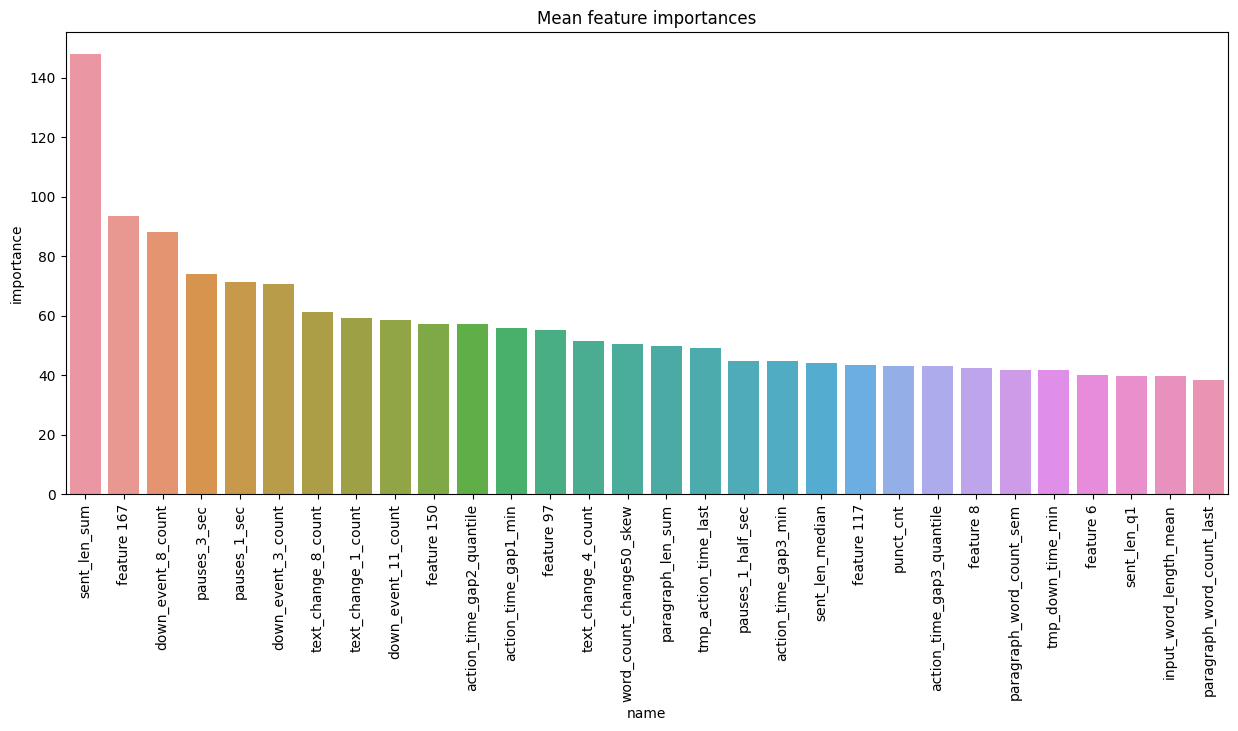

In [53]:
plt.figure(figsize=(15, 6))

ax = sns.barplot(data=feature_importance_df.head(30), x='name', y='importance')
ax.set_title(f"Mean feature importances")
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)

plt.show()

In [54]:
test_predict_list

[array([1.36828779, 1.23395997, 1.25455657]),
 array([1.51843418, 1.45393533, 1.44851566]),
 array([1.39832531, 1.35676803, 1.37327398]),
 array([1.38353213, 1.34616421, 1.36101058]),
 array([1.35720839, 1.31024894, 1.27346388]),
 array([1.52944273, 1.52108345, 1.50978683]),
 array([1.49097683, 1.45417437, 1.47600294]),
 array([1.50325905, 1.52757277, 1.49715975]),
 array([1.48976685, 1.51494248, 1.49824505]),
 array([1.54135859, 1.5199703 , 1.50768171]),
 array([1.48844249, 1.48487544, 1.4668011 ]),
 array([1.53376063, 1.51557672, 1.52227477]),
 array([1.55621123, 1.53802845, 1.54387079]),
 array([1.41779903, 1.3730759 , 1.41072363]),
 array([1.75161098, 1.75431906, 1.73154867]),
 array([1.57674045, 1.58598528, 1.58828572]),
 array([1.25266157, 1.20950501, 1.2459094 ]),
 array([1.46720506, 1.40608451, 1.42399682]),
 array([1.61643529, 1.60289383, 1.58536447]),
 array([1.59279243, 1.51148415, 1.52737218]),
 array([1.24915136, 1.19398151, 1.2601285 ]),
 array([1.75395511, 1.6975122 , 1.

In [55]:
valid_predict_list

[array([3.14255712, 5.08292453, 3.52320207, 4.41283585, 4.29443837,
        4.63995009, 4.45883955, 3.22193832, 3.93788653, 3.93817757,
        3.38519214, 3.83664595, 5.19673486, 3.44781959, 5.15250573,
        2.83608934, 3.88649882, 2.57765646, 4.04529805, 4.20626172,
        3.25341755, 3.12410769, 4.30429061, 4.93598945, 2.54338621,
        4.54270764, 5.15097937, 4.04045038, 2.66451181, 2.63126154,
        3.20037832, 3.19472239, 5.29122916, 3.63166686, 3.11931104,
        2.98558893, 3.59972153, 4.18058291, 3.14553586, 4.03012019,
        4.35674396, 3.48237792, 4.6242817 , 3.03632647, 2.65831408,
        4.28308044, 2.68015095, 4.22358835, 3.67234938, 2.72682783,
        4.05756151, 4.12115929, 4.64765906, 4.26590809, 2.80044349,
        4.3958652 , 4.27693657, 3.87351846, 4.73630092, 3.76993458,
        4.60625775, 4.36316626, 3.84663187, 3.62563224, 2.86703095,
        4.44684437, 2.65280022, 3.76073922, 3.115303  , 3.44064903,
        4.3663342 , 3.70073651, 3.14811401, 2.73

In [56]:
test_feats['score'] = np.mean(test_predict_list, axis=0)
test_feats

,paragraph_count,paragraph_len_mean,paragraph_len_std,paragraph_len_min,paragraph_len_max,paragraph_len_first,paragraph_len_last,paragraph_len_sem,paragraph_len_q1,paragraph_len_median,...,largest_lantency,smallest_lantency,median_lantency,initial_pause,pauses_half_sec,pauses_1_sec,pauses_1_half_sec,pauses_2_sec,pauses_3_sec,score
0,1,2.0,120.932488,2,2,2,2,60.466244,2.0,2.0,...,421.555,0.0,210.7775,338.433,0,0,0,0,1,1.500086
1,1,2.0,120.932488,2,2,2,2,60.466244,2.0,2.0,...,421.521,0.0,210.7605,711.956,0,0,0,0,1,1.471744
2,1,2.0,120.932488,2,2,2,2,60.466244,2.0,2.0,...,450.645,0.0,225.3225,635.547,0,0,0,0,1,1.474145


In [57]:
publiclgbm_pred = test_feats[['id', 'score']]

In [58]:
publiclgbm_pred

,id,score
0,0000aaaa,1.500086
1,2222bbbb,1.471744
2,4444cccc,1.474145


In [63]:
test_feats['score'] = average_test_predict
publiclgbm_pred = test_feats[['id', 'score']]
print(publiclgbm_pred)


         id     score
0  0000aaaa  1.509431
1  2222bbbb  1.472149
2  4444cccc  1.481398


In [64]:
oof_valid_preds

array([3.35138083, 3.30781071, 4.64013188, ..., 2.        , 4.5       ,
       3.31190259])

In [65]:
# lgbm + xgb ensemble go 

In [66]:
import polars as pl
import pandas as pd
import numpy as np
import re
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from scipy.stats import skew, kurtosis
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings("ignore")
from functools import partial
from sklearn import model_selection,metrics
import optuna
warnings.filterwarnings("ignore")

In [67]:
num_cols = ['down_time', 'up_time', 'action_time', 'cursor_position', 'word_count']
activities = ['Input', 'Remove/Cut', 'Nonproduction', 'Replace', 'Paste']
events = ['q', 'Space', 'Backspace', 'Shift', 'ArrowRight', 'Leftclick', 'ArrowLeft', '.', ',', 'ArrowDown', 'ArrowUp', 'Enter', 'CapsLock', "'", 'Delete', 'Unidentified']
text_changes = ['q', ' ', '.', ',', '\n', "'", '"', '-', '?', ';', '=', '/', '\\', ':']


def count_by_values(df, colname, values):
    fts = df.select(pl.col('id').unique(maintain_order=True))
    for i, value in enumerate(values):
        tmp_df = df.group_by('id').agg(pl.col(colname).is_in([value]).sum().alias(f'{colname}_{i}_cnt'))
        fts  = fts.join(tmp_df, on='id', how='left') 
    return fts


def dev_feats(df):
    
    print("< Count by values features >")
    
    feats = count_by_values(df, 'activity', activities)
    feats = feats.join(count_by_values(df, 'text_change', text_changes), on='id', how='left') 
    feats = feats.join(count_by_values(df, 'down_event', events), on='id', how='left') 
    feats = feats.join(count_by_values(df, 'up_event', events), on='id', how='left') 

    print("< Input words stats features >")

    temp = df.filter((~pl.col('text_change').str.contains('=>')) & (pl.col('text_change') != 'NoChange'))
    temp = temp.group_by('id').agg(pl.col('text_change').str.concat('').str.extract_all(r'q+'))
    temp = temp.with_columns(input_word_count = pl.col('text_change').list.lengths(),
                             input_word_length_mean = pl.col('text_change').apply(lambda x: np.mean([len(i) for i in x] if len(x) > 0 else 0)),
                             input_word_length_max = pl.col('text_change').apply(lambda x: np.max([len(i) for i in x] if len(x) > 0 else 0)),
                             input_word_length_std = pl.col('text_change').apply(lambda x: np.std([len(i) for i in x] if len(x) > 0 else 0)),
                             input_word_length_median = pl.col('text_change').apply(lambda x: np.median([len(i) for i in x] if len(x) > 0 else 0)),
                             input_word_length_skew = pl.col('text_change').apply(lambda x: skew([len(i) for i in x] if len(x) > 0 else 0)))
    temp = temp.drop('text_change')
    feats = feats.join(temp, on='id', how='left') 


    
    print("< Numerical columns features >")

    temp = df.group_by("id").agg(pl.sum('action_time').suffix('_sum'), pl.mean(num_cols).suffix('_mean'), pl.std(num_cols).suffix('_std'),
                                 pl.median(num_cols).suffix('_median'), pl.min(num_cols).suffix('_min'), pl.max(num_cols).suffix('_max'),
                                 pl.quantile(num_cols, 0.5).suffix('_quantile'))
    feats = feats.join(temp, on='id', how='left') 


    print("< Categorical columns features >")
    
    temp  = df.group_by("id").agg(pl.n_unique(['activity', 'down_event', 'up_event', 'text_change']))
    feats = feats.join(temp, on='id', how='left') 


    
    print("< Idle time features >")

    temp = df.with_columns(pl.col('up_time').shift().over('id').alias('up_time_lagged'))
    temp = temp.with_columns((abs(pl.col('down_time') - pl.col('up_time_lagged')) / 1000).fill_null(0).alias('time_diff'))
    temp = temp.filter(pl.col('activity').is_in(['Input', 'Remove/Cut']))
    temp = temp.group_by("id").agg(inter_key_largest_lantency = pl.max('time_diff'),
                                   inter_key_median_lantency = pl.median('time_diff'),
                                   mean_pause_time = pl.mean('time_diff'),
                                   std_pause_time = pl.std('time_diff'),
                                   total_pause_time = pl.sum('time_diff'),
                                   pauses_half_sec = pl.col('time_diff').filter((pl.col('time_diff') > 0.5) & (pl.col('time_diff') < 1)).count(),
                                   pauses_1_sec = pl.col('time_diff').filter((pl.col('time_diff') > 1) & (pl.col('time_diff') < 1.5)).count(),
                                   pauses_1_half_sec = pl.col('time_diff').filter((pl.col('time_diff') > 1.5) & (pl.col('time_diff') < 2)).count(),
                                   pauses_2_sec = pl.col('time_diff').filter((pl.col('time_diff') > 2) & (pl.col('time_diff') < 3)).count(),
                                   pauses_3_sec = pl.col('time_diff').filter(pl.col('time_diff') > 3).count(),)
    feats = feats.join(temp, on='id', how='left') 
    
    print("< P-bursts features >")

    temp = df.with_columns(pl.col('up_time').shift().over('id').alias('up_time_lagged'))
    temp = temp.with_columns((abs(pl.col('down_time') - pl.col('up_time_lagged')) / 1000).fill_null(0).alias('time_diff'))
    temp = temp.filter(pl.col('activity').is_in(['Input', 'Remove/Cut']))
    temp = temp.with_columns(pl.col('time_diff')<2)
    temp = temp.with_columns(pl.when(pl.col("time_diff") & pl.col("time_diff").is_last()).then(pl.count()).over(pl.col("time_diff").rle_id()).alias('P-bursts'))
    temp = temp.drop_nulls()
    temp = temp.group_by("id").agg(pl.mean('P-bursts').suffix('_mean'), pl.std('P-bursts').suffix('_std'), pl.count('P-bursts').suffix('_count'),
                                   pl.median('P-bursts').suffix('_median'), pl.max('P-bursts').suffix('_max'),
                                   pl.first('P-bursts').suffix('_first'), pl.last('P-bursts').suffix('_last'))
    feats = feats.join(temp, on='id', how='left') 


    print("< R-bursts features >")

    temp = df.filter(pl.col('activity').is_in(['Input', 'Remove/Cut']))
    temp = temp.with_columns(pl.col('activity').is_in(['Remove/Cut']))
    temp = temp.with_columns(pl.when(pl.col("activity") & pl.col("activity").is_last()).then(pl.count()).over(pl.col("activity").rle_id()).alias('R-bursts'))
    temp = temp.drop_nulls()
    temp = temp.group_by("id").agg(pl.mean('R-bursts').suffix('_mean'), pl.std('R-bursts').suffix('_std'), 
                                   pl.median('R-bursts').suffix('_median'), pl.max('R-bursts').suffix('_max'),
                                   pl.first('R-bursts').suffix('_first'), pl.last('R-bursts').suffix('_last'))
    feats = feats.join(temp, on='id', how='left')
    
    return feats


def train_valid_split(data_x, data_y, train_idx, valid_idx):
    x_train = data_x.iloc[train_idx]
    y_train = data_y[train_idx]
    x_valid = data_x.iloc[valid_idx]
    y_valid = data_y[valid_idx]
    return x_train, y_train, x_valid, y_valid

def round_to_nearest_half(data):
    rounded_data = []
    for num in data:
        nearest_half = round(num * 2) / 2
        if abs(nearest_half - num) <= 0.11:
            rounded_data.append(nearest_half)
        else:
            rounded_data.append(num)
    return rounded_data

# def evaluate(data_x, data_y, model, random_state=42, n_splits=5, test_x=None):
#     skf    = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
#     test_y = np.zeros(len(data_x)) if (test_x is None) else np.zeros((len(test_x), n_splits))
#     for i, (train_index, valid_index) in enumerate(skf.split(data_x, data_y.astype(str))):
#         train_x, train_y, valid_x, valid_y = train_valid_split(data_x, data_y, train_index, valid_index)
#         model.fit(train_x, train_y)
#         if test_x is None:
#             test_y[valid_index] = model.predict(valid_x)
#         else:
#             test_y[:, i] = model.predict(test_x)
#     return test_y if (test_x is None) else np.mean(test_y, axis=1)



# def evaluate(data_x, data_y, model, random_state=42, n_splits=5, test_x=None):
#     skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
#     test_y = np.zeros(len(data_x)) if (test_x is None) else np.zeros((len(test_x), n_splits))
#     for i, (train_index, valid_index) in enumerate(skf.split(data_x, data_y.astype(str))):
#         train_x, train_y, valid_x, valid_y = train_valid_split(data_x, data_y, train_index, valid_index)
#         model.fit(train_x, train_y)
#         if test_x is None:
#             test_y[valid_index] = model.predict(valid_x)
#         else:
#             test_y[:, i] = model.predict(test_x)
#     print(test_y)
#     # 적용할 부분: 여기에 round_to_nearest_half 함수 적용
#     if test_x is None:
#         final_predictions = round_to_nearest_half(test_y)
#     else:
#         final_predictions = round_to_nearest_half(np.mean(test_y, axis=1))

#     return final_predictions


# test_y 평균내기 전에 미리 반올림하고 평균내는 걸로 로직 변경, 바로 위는 평균내고 반올림하는 로직이었음.

def evaluate(data_x, data_y, model, random_state=42, n_splits=10, test_x=None):
    skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    if test_x is None:
        test_y = np.zeros(len(data_x))
    else:
        test_y = np.zeros((len(test_x), n_splits))

    for i, (train_index, valid_index) in enumerate(skf.split(data_x, data_y.astype(str))):
        train_x, train_y, valid_x, valid_y = train_valid_split(data_x, data_y, train_index, valid_index)
        model.fit(train_x, train_y)
        if test_x is None:
            predictions = model.predict(valid_x)
            # 먼저 반올림을 적용
            rounded_predictions = round_to_nearest_half(predictions)
            test_y[valid_index] = rounded_predictions
        else:
            predictions = model.predict(test_x)
            # 먼저 반올림을 적용
            rounded_predictions = round_to_nearest_half(predictions)
            test_y[:, i] = rounded_predictions
    print(test_y)
    # 평균을 계산하여 반환
    if test_x is None:
        return test_y
    else:
        return np.mean(test_y, axis=1)


In [68]:
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)

AGGREGATIONS = ['count', 'mean', 'min', 'max', 'first', 'last', q1, 'median', q3, 'sum']

def reconstruct_essay(currTextInput):
    essayText = ""
    for Input in currTextInput.values:
        if Input[0] == 'Replace':
            replaceTxt = Input[2].split(' => ')
            essayText = essayText[:Input[1] - len(replaceTxt[1])] + replaceTxt[1] + essayText[Input[1] - len(replaceTxt[1]) + len(replaceTxt[0]):]
            continue
        if Input[0] == 'Paste':
            essayText = essayText[:Input[1] - len(Input[2])] + Input[2] + essayText[Input[1] - len(Input[2]):]
            continue
        if Input[0] == 'Remove/Cut':
            essayText = essayText[:Input[1]] + essayText[Input[1] + len(Input[2]):]
            continue
        if "M" in Input[0]:
            croppedTxt = Input[0][10:]
            splitTxt = croppedTxt.split(' To ')
            valueArr = [item.split(', ') for item in splitTxt]
            moveData = (int(valueArr[0][0][1:]), int(valueArr[0][1][:-1]), int(valueArr[1][0][1:]), int(valueArr[1][1][:-1]))
            if moveData[0] != moveData[2]:
                if moveData[0] < moveData[2]:
                    essayText = essayText[:moveData[0]] + essayText[moveData[1]:moveData[3]] + essayText[moveData[0]:moveData[1]] + essayText[moveData[3]:]
                else:
                    essayText = essayText[:moveData[2]] + essayText[moveData[0]:moveData[1]] + essayText[moveData[2]:moveData[0]] + essayText[moveData[1]:]
            continue
        essayText = essayText[:Input[1] - len(Input[2])] + Input[2] + essayText[Input[1] - len(Input[2]):]
    return essayText


def get_essay_df(df):
    df       = df[df.activity != 'Nonproduction']
    temp     = df.groupby('id').apply(lambda x: reconstruct_essay(x[['activity', 'cursor_position', 'text_change']]))
    essay_df = pd.DataFrame({'id': df['id'].unique().tolist()})
    essay_df = essay_df.merge(temp.rename('essay'), on='id')
    return essay_df


def word_feats(df):
    essay_df = df
    df['word'] = df['essay'].apply(lambda x: re.split(' |\\n|\\.|\\?|\\!',x))
    df = df.explode('word')
    df['word_len'] = df['word'].apply(lambda x: len(x))
    df = df[df['word_len'] != 0]

    word_agg_df = df[['id','word_len']].groupby(['id']).agg(AGGREGATIONS)
    word_agg_df.columns = ['_'.join(x) for x in word_agg_df.columns]
    word_agg_df['id'] = word_agg_df.index
    word_agg_df = word_agg_df.reset_index(drop=True)
    return word_agg_df


def sent_feats(df):
    df['sent'] = df['essay'].apply(lambda x: re.split('\\.|\\?|\\!',x))
    df = df.explode('sent')
    df['sent'] = df['sent'].apply(lambda x: x.replace('\n','').strip())
    # Number of characters in sentences
    df['sent_len'] = df['sent'].apply(lambda x: len(x))
    # Number of words in sentences
    df['sent_word_count'] = df['sent'].apply(lambda x: len(x.split(' ')))
    df = df[df.sent_len!=0].reset_index(drop=True)

    sent_agg_df = pd.concat([df[['id','sent_len']].groupby(['id']).agg(AGGREGATIONS), 
                             df[['id','sent_word_count']].groupby(['id']).agg(AGGREGATIONS)], axis=1)
    sent_agg_df.columns = ['_'.join(x) for x in sent_agg_df.columns]
    sent_agg_df['id'] = sent_agg_df.index
    sent_agg_df = sent_agg_df.reset_index(drop=True)
    sent_agg_df.drop(columns=["sent_word_count_count"], inplace=True)
    sent_agg_df = sent_agg_df.rename(columns={"sent_len_count":"sent_count"})
    return sent_agg_df


def parag_feats(df):
    df['paragraph'] = df['essay'].apply(lambda x: x.split('\n'))
    df = df.explode('paragraph')
    # Number of characters in paragraphs
    df['paragraph_len'] = df['paragraph'].apply(lambda x: len(x)) 
    # Number of words in paragraphs
    df['paragraph_word_count'] = df['paragraph'].apply(lambda x: len(x.split(' ')))
    df = df[df.paragraph_len!=0].reset_index(drop=True)
    
    paragraph_agg_df = pd.concat([df[['id','paragraph_len']].groupby(['id']).agg(AGGREGATIONS), 
                                  df[['id','paragraph_word_count']].groupby(['id']).agg(AGGREGATIONS)], axis=1) 
    paragraph_agg_df.columns = ['_'.join(x) for x in paragraph_agg_df.columns]
    paragraph_agg_df['id'] = paragraph_agg_df.index
    paragraph_agg_df = paragraph_agg_df.reset_index(drop=True)
    paragraph_agg_df.drop(columns=["paragraph_word_count_count"], inplace=True)
    paragraph_agg_df = paragraph_agg_df.rename(columns={"paragraph_len_count":"paragraph_count"})
    return paragraph_agg_df

def product_to_keys(logs, essays):
    essays['product_len'] = essays.essay.str.len()
    tmp_df = logs[logs.activity.isin(['Input', 'Remove/Cut'])].groupby(['id']).agg({'activity': 'count'}).reset_index().rename(columns={'activity': 'keys_pressed'})
    essays = essays.merge(tmp_df, on='id', how='left')
    essays['product_to_keys'] = essays['product_len'] / essays['keys_pressed']
    return essays[['id', 'product_to_keys']]

def get_keys_pressed_per_second(logs):
    temp_df = logs[logs['activity'].isin(['Input', 'Remove/Cut'])].groupby(['id']).agg(keys_pressed=('event_id', 'count')).reset_index()
    temp_df_2 = logs.groupby(['id']).agg(min_down_time=('down_time', 'min'), max_up_time=('up_time', 'max')).reset_index()
    temp_df = temp_df.merge(temp_df_2, on='id', how='left')
    temp_df['keys_per_second'] = temp_df['keys_pressed'] / ((temp_df['max_up_time'] - temp_df['min_down_time']) / 1000)
    return temp_df[['id', 'keys_per_second']]

In [69]:
data_path     = '/kaggle/input/linking-writing-processes-to-writing-quality/'
train_logs    = pl.scan_csv(data_path + 'train_logs.csv')
train_feats   = dev_feats(train_logs)
train_feats   = train_feats.collect().to_pandas()

print('< Essay Reconstruction >')
train_logs             = train_logs.collect().to_pandas()
train_essays           = get_essay_df(train_logs)
train_feats            = train_feats.merge(word_feats(train_essays), on='id', how='left')
train_feats            = train_feats.merge(sent_feats(train_essays), on='id', how='left')
train_feats            = train_feats.merge(parag_feats(train_essays), on='id', how='left')
train_feats            = train_feats.merge(get_keys_pressed_per_second(train_logs), on='id', how='left')
train_feats            = train_feats.merge(product_to_keys(train_logs, train_essays), on='id', how='left')


print('< Mapping >')
train_scores   = pd.read_csv(data_path + 'train_scores.csv')
data           = train_feats.merge(train_scores, on='id', how='left')
x              = data.drop(['id', 'score'], axis=1)
y              = data['score'].values
print(f'Number of features: {len(x.columns)}')


print('< Testing Data >')
test_logs   = pl.scan_csv(data_path + 'test_logs.csv')
test_feats  = dev_feats(test_logs)
test_feats  = test_feats.collect().to_pandas()

test_logs             = test_logs.collect().to_pandas()
test_essays           = get_essay_df(test_logs)
test_feats            = test_feats.merge(word_feats(test_essays), on='id', how='left')
test_feats            = test_feats.merge(sent_feats(test_essays), on='id', how='left')
test_feats            = test_feats.merge(parag_feats(test_essays), on='id', how='left')
test_feats            = test_feats.merge(get_keys_pressed_per_second(test_logs), on='id', how='left')
test_feats            = test_feats.merge(product_to_keys(test_logs, test_essays), on='id', how='left')


test_ids = test_feats['id'].values
testin_x = test_feats.drop(['id'], axis=1)



< Count by values features >
< Input words stats features >
< Numerical columns features >
< Categorical columns features >
< Idle time features >
< P-bursts features >
< R-bursts features >
< Essay Reconstruction >
< Mapping >
Number of features: 165
< Testing Data >
< Count by values features >
< Input words stats features >
< Numerical columns features >
< Categorical columns features >
< Idle time features >
< P-bursts features >
< R-bursts features >


In [70]:
print('< LGBM Learning and Evaluation >')
lgbm_param = {'n_estimators': 1024,
         'learning_rate': 0.005,
         'metric': 'rmse',
         'random_state': 42,
         'force_col_wise': True,
         'verbosity': 0,}
lgbm_solution = LGBMRegressor(**lgbm_param)
lgbm_pred   = evaluate(x.copy(), y.copy(), lgbm_solution, test_x=testin_x.copy()) 

lgbm_sub = pd.DataFrame({'id': test_ids, 'score': lgbm_pred})
#sub.to_csv('submission.csv', index=False)

< LGBM Learning and Evaluation >
[[1.20398692 1.5        1.5        1.38327221 1.23160868 1.30075916
  1.255965   1.1796386  1.         1.36010775]
 [1.17247628 1.5        1.5        1.38549774 1.2630623  1.3031452
  1.23954692 1.17115236 1.         1.34758125]
 [1.18038688 1.5        1.5        1.37409757 1.26562413 1.3031452
  1.24045672 1.17408863 1.         1.34590818]]


In [72]:
lgbm_pred

array([1.29153383, 1.28824621, 1.28837073])

In [73]:
y.copy()


array([3.5, 3.5, 6. , ..., 1.5, 5. , 4. ])

In [74]:
lgbm_sub

,id,score
0,0000aaaa,1.291534
1,2222bbbb,1.288246
2,4444cccc,1.288371


In [75]:
# feature_importances_values = np.asarray([model.feature_importances_ for model in models_dict.values()]).mean(axis=0)
# feature_importance_df = pd.DataFrame({'name': train_cols, 'importance': feature_importances_values})

# feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

In [76]:
np.mean(scores)

0.611453636078436

In [77]:
# plt.figure(figsize=(15, 6))

# ax = sns.barplot(data=feature_importance_df.head(30), x='name', y='importance')
# ax.set_title(f"Mean feature importances")
# ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)

# plt.show()

In [78]:
print('< XGB Learning and Evaluation >')

xgb_param={
'reg_alpha': 0.0008774661176012108,
'reg_lambda': 2.542812743920178,
'colsample_bynode': 0.7839026197349153,
'subsample': 0.8994226268096415,
'eta': 0.04730766698056879, 
'max_depth': 3, 
'n_estimators': 1024,
'random_state': 42,
'eval_metric': 'rmse'
}

xgb_solution = XGBRegressor(**xgb_param)
xgb_pred   = evaluate(x.copy(), y.copy(), xgb_solution, test_x=testin_x.copy()) 

xgb_sub = pd.DataFrame({'id': test_ids, 'score': xgb_pred})
#xgb_sub.to_csv('submission.csv', index=False)

< XGB Learning and Evaluation >
[[2.35902429 2.64773965 3.         3.         3.26202631 2.70041561
  2.5        2.83768034 2.79118013 2.5       ]
 [1.5        1.65024781 1.38891184 1.5        1.5        1.5
  1.         1.22655249 1.         1.37868285]
 [1.5        1.70110476 1.5        1.5        1.5        1.5
  1.         1.21900117 1.         1.5       ]]


In [79]:
xgb_pred

array([2.75980663, 1.3644395 , 1.39201059])

In [80]:
# 넘파이 배열로 변환 (필요한 경우)
lgbm_pred_array = np.array(lgbm_pred) if not isinstance(lgbm_pred, np.ndarray) else lgbm_pred
xgb_pred_array = np.array(xgb_pred) if not isinstance(xgb_pred, np.ndarray) else xgb_pred

# 최적의 가중치 설정
best_w = 0.81
W = [best_w, 1 - best_w]
print(W)

# 수정된 부분: 넘파이 배열을 사용하여 앙상블 예측 계산
ensemble_preds = lgbm_pred_array * W[0] + xgb_pred_array * W[1]
ensemble_preds

[0.81, 0.18999999999999995]


array([1.57050566, 1.30272293, 1.3080623 ])

In [81]:
ensemble_sub = pd.DataFrame({'id': test_ids, 'score': ensemble_preds})
ensemble_sub

,id,score
0,0000aaaa,1.570506
1,2222bbbb,1.302723
2,4444cccc,1.308062


In [82]:
publiclgbm_pred

,id,score
0,0000aaaa,1.509431
1,2222bbbb,1.472149
2,4444cccc,1.481398


In [83]:
# 두 데이터프레임을 'id' 컬럼을 기준으로 병합
merged_df = ensemble_sub.merge(publiclgbm_pred, on='id', suffixes=('_ensemble', '_publiclgbm'))

# 가중치 설정
weight_ensemble = 0.5
weight_publiclgbm = 0.5

# 가중 평균 점수 계산하여 원래의 'score' 컬럼에 저장
merged_df['score'] = (merged_df['score_ensemble'] * weight_ensemble) + (merged_df['score_publiclgbm'] * weight_publiclgbm)
merged_df.drop(['score_ensemble', 'score_publiclgbm'], axis=1, inplace=True)
# 결과 출력
merged_df

,id,score
0,0000aaaa,1.539968
1,2222bbbb,1.387436
2,4444cccc,1.394730


In [84]:
merged_df.to_csv('submission.csv', index=False)

In [85]:
# post preprocessing (ex:3.05라면 걍 3.0으로 줄여보자)

In [86]:


# def train_valid_split(data_x, data_y, train_idx, valid_idx):
#     x_train = data_x.iloc[train_idx]
#     y_train = data_y[train_idx]
#     x_valid = data_x.iloc[valid_idx]
#     y_valid = data_y[valid_idx]
#     return x_train, y_train, x_valid, y_valid

# # LightGBM 
# lgbm_param = {
#     'n_estimators': 1024,
#     'learning_rate': 0.005,
#     'metric': 'rmse',
#     'random_state': 42
# }

# # XGB
# xgb_param = {
#     'reg_alpha': 0.0008774661176012108,
#     'reg_lambda': 2.542812743920178,
#     'colsample_bynode': 0.7839026197349153,
#     'subsample': 0.8994226268096415,
#     'eta': 0.04730766698056879, 
#     'max_depth': 3, 
#     'n_estimators': 1024,
#     'random_state': 42,
#     'eval_metric': 'rmse'
# }

# lgbm_model = LGBMRegressor(**lgbm_param)
# xgb_model = XGBRegressor(**xgb_param)

# # stratified kfold 적용
# skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
# lgbm_preds = []
# xgb_preds = []
# valid_y_list = []

# for train_index, valid_index in skf.split(x, y.astype(str)):     
#     train_x, train_y, valid_x, valid_y = train_valid_split(x, y, train_index, valid_index)

#     lgbm_model.fit(train_x, train_y)
#     lgbm_preds.append(lgbm_model.predict(valid_x))

#     xgb_model.fit(train_x, train_y)
#     xgb_preds.append(xgb_model.predict(valid_x))

#     # 검증 타겟 저장
#     valid_y_list.append(valid_y)

# # 모든 fold의 예측값과 실제값 통합
# lgbm_preds = np.concatenate(lgbm_preds)
# xgb_preds = np.concatenate(xgb_preds)
# valid_y_combined = np.concatenate(valid_y_list)

# print('lgbm_preds: ', lgbm_preds)
# print('xgb_preds: ', xgb_preds)
# print('valid_y_combined: ', valid_y_combined)



# # # 최적 가중치 
# # best_sc = float('inf')
# # best_w = 0
# # for w in np.arange(0, 1.01, 0.01):
# #     combined_pred = w * lgbm_preds + (1-w) * xgb_preds
# #     sc = mean_squared_error(valid_y_combined, combined_pred, squared=False)
# #     if sc < best_sc:
# #         best_sc = sc
# #         best_w = w

# # print('최적의 RMSE 점수 = {:.5f}'.format(best_sc))
# # print('최적의 가중치 W = {:.3f}'.format(best_w))





In [87]:
# # 새로운 배열 초기화


# def round_to_nearest_half(data):
#     rounded_data = []
#     for num in data:
#         nearest_half = round(num * 2) / 2
#         if abs(nearest_half - num) <= 0.1:
#             rounded_data.append(nearest_half)
#         else:
#             rounded_data.append(num)
#     return rounded_data

# rounded_data1 = round_to_nearest_half(lgbm_preds)
# rounded_data2 = round_to_nearest_half(xgb_preds)


In [88]:
# lgbm_xgb_preds = 0.81 * lgbm_preds + 0.19 * xgb_preds
# len(lgbm_xgb_preds)

In [89]:
# # public lgbm의 oof valid pred 가져오기
# oof_valid_preds
# a=len(oof_valid_preds)
# a

In [90]:
# len(valid_y_combined)

In [91]:
# # 다시 블렌딩하여 최종 모델의 최적의 가중치 찾아보자 

# # 최적 가중치
# best_sc = float('inf')
# best_w = 0
# for w in np.arange(0, 1.01, 0.01):
#     combined_pred = w * lgbm_xgb_preds + (1-w) * oof_valid_preds
#     sc = mean_squared_error(valid_y_combined, combined_pred, squared=False)
#     if sc < best_sc:
#         best_sc = sc
#         best_w = w

# print('최적의 RMSE 점수 = {:.5f}'.format(best_sc))
# print('최적의 가중치 W = {:.3f}'.format(best_w))